In [ ]:
#For data processing
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv("../input/titanic/train.csv")
tf1 = pd.read_csv("../input/titanic/test.csv")
result = pd.read_csv("../input/titanic/gender_submission.csv")

In [ ]:
df1.head()

In [ ]:
tf1.head()

In [ ]:
df2 = df1.copy()
df1.describe()

In [ ]:
tf2 = tf1.copy()
tf1.describe()

In [ ]:
df1.shape

In [ ]:
tf1.shape

In [ ]:
df1.dtypes

In [ ]:
tf1.dtypes

In [ ]:
df1.isnull().sum()

In [ ]:
tf1.isnull().sum()

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(df1.isnull(),yticklabels=False)

Heatmap for missing values.

In [ ]:
sns.heatmap(tf1.isnull(),yticklabels=False)

Heatmap for missing values.

In [ ]:
df1['Survived'].value_counts()

<h3>1.) Categorical values --> PassengerId, Survived, Name, Sex, Ticket, Cabin, Embarked </h3>
<h3>2.) Ordinal values --> Pclass </h3>
<h3>3.) Numerical values --> Age, SibSp, Parch, Fare </h3>

<h1>Feature Reengineering </h1>

<h2>Categorical Variables</h2>

<h3> Name ---> </h3>

In [ ]:
df2.drop(['PassengerId'],axis = 1, inplace = True)
tf2.drop(['PassengerId'],axis = 1, inplace = True)

In [ ]:
df2.head()

In [ ]:
new = df2['Name'].str.split('.', n=1, expand = True)
df2['First'] = new[0]
df2['Last'] = new[1]
new1 = df2['First'].str.split(',', n=1, expand = True)
df2['First1'] = new1[0]
df2['Title'] = new1[1]
new2 = df2['Title'].str.split('', n=1, expand = True)


In [ ]:
df2['Title'].unique()

In [ ]:
df2.replace(to_replace = [ ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], value = ' Honorary', inplace = True)

In [ ]:
df2['Title'].value_counts()
df3 = df2.copy()

In [ ]:
df2.drop(['First','Last','First1','Name'],axis = 1,inplace = True)

In [ ]:
conversion1 = pd.get_dummies(df2.Title,prefix = 'Title')
df2 = pd.concat([df2 , conversion1], axis = 1)

In [24]:
df2.drop(['Title'],axis = 1, inplace = True)

In [25]:
tf2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
tnew = tf2['Name'].str.split('.', n=1, expand = True)
tf2['First'] = tnew[0]
tf2['Last'] = tnew[1]
tnew1 = tf2['First'].str.split(',', n=1, expand = True)
tf2['First1'] = tnew1[0]
tf2['Last1'] = tnew1[1]
tnew2 = tf2['Last1'].str.split('', n=1, expand = True)

In [27]:
tf2['Last1'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [28]:
tf2.replace(to_replace = [ ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Dona'], value = ' Honorary', inplace = True)

In [29]:
tf2['Last1'].value_counts()

 Mr          240
 Miss         78
 Mrs          72
 Master       21
 Honorary      7
Name: Last1, dtype: int64

In [30]:
tf2.drop(['First','Last','First1','Name'],axis = 1,inplace = True)

In [31]:
testconversion1 = pd.get_dummies(tf2.Last1,prefix = 'Title')
tf2 = pd.concat([tf2 , testconversion1], axis = 1)

In [32]:
tf2.drop(['Last1'],axis = 1, inplace = True)

<h1> Sex ---> </h1>


In [33]:
conversion2 = pd.get_dummies(df2.Sex,prefix = 'Gender_')
df2 = pd.concat([df2 , conversion2], axis = 1)

In [34]:
df2.drop(['Sex'],inplace = True,axis = 1)

In [35]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,1,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,1,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,0,0,1


In [36]:
testconversion2 = pd.get_dummies(tf2.Sex,prefix = 'Gender_')
tf2 = pd.concat([tf2 , testconversion2], axis = 1)

In [37]:
tf2.drop(['Sex'],inplace = True,axis = 1)

In [38]:
tf2.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male
0,3,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,1,0,0,1
1,3,47.0,1,0,363272,7.0000,NaN,S,0,0,0,0,1,1,0
2,2,62.0,0,0,240276,9.6875,NaN,Q,0,0,0,1,0,0,1
3,3,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1,0,0,1
4,3,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,0,1,1,0


<h3> Ticket ---> </h3>

In [39]:
df2['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
3101295              6
                    ..
A/5 21174            1
STON/O 2. 3101280    1
237798               1
349244               1
248723               1
Name: Ticket, Length: 681, dtype: int64

In [40]:
df2['Ticket'] = df2['Ticket'].astype(str)
df2['Ticket_length'] = df2.Ticket.apply(len)

In [41]:
df2['Ticket_length'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_length, dtype: int64

In [42]:
df2['Ticket_length'] = np.where(((df2.Ticket_length == 3) | (df2.Ticket_length == 4) | (df2.Ticket_length == 5)),4,df2.Ticket_length)

df2['Ticket_length'] = np.where(((df2.Ticket_length == 7) | (df2.Ticket_length == 8) | (df2.Ticket_length == 9) | (df2.Ticket_length == 10)
                                 | (df2.Ticket_length == 17)|(df2.Ticket_length == 16)| (df2.Ticket_length == 13)| (df2.Ticket_length == 12) | (df2.Ticket_length == 15)
                                |(df2.Ticket_length == 11)| (df2.Ticket_length == 18)),12,df2.Ticket_length)

In [43]:
df2['Ticket_length'].value_counts()

6     419
12    238
4     234
Name: Ticket_length, dtype: int64

In [44]:
df2['Ticket_length'] = df2['Ticket_length'].astype(str)

df2['Ticket_length'] = np.where(((df2.Ticket_length == '4')),'Below 6',df2.Ticket_length)
df2['Ticket_length'] = np.where(((df2.Ticket_length == '6')),'At 6',df2.Ticket_length)
df2['Ticket_length'] = np.where(((df2.Ticket_length == '12')),'Above 6',df2.Ticket_length)

In [45]:
df4 = df2.copy()

In [46]:
conversion2 = pd.get_dummies(df2.Ticket_length, prefix = 'Ticket Length')
df2 = pd.concat([df2 , conversion2], axis = 1)

df2.drop(['Ticket','Ticket_length'],axis = 1, inplace = True)

In [47]:
tf2['Ticket'].value_counts()

PC 17608       5
CA. 2343       4
113503         4
PC 17483       3
C.A. 31029     3
              ..
SC/A.3 2861    1
24160          1
PC 17594       1
248744         1
366713         1
Name: Ticket, Length: 363, dtype: int64

In [48]:
tf2['Ticket'] = tf2['Ticket'].astype(str)
tf2['Ticket_length'] = tf2.Ticket.apply(len)

In [49]:
tf2['Ticket_length'].value_counts()

6     183
5      62
4      47
8      42
10     22
9      11
11     10
13      9
7       9
18      8
12      6
15      3
17      2
16      2
3       2
Name: Ticket_length, dtype: int64

In [50]:
tf2['Ticket_length'] = np.where(((tf2.Ticket_length == 3) | (tf2.Ticket_length == 4) | (tf2.Ticket_length == 5)),4,tf2.Ticket_length)

tf2['Ticket_length'] = np.where(((tf2.Ticket_length == 7) | (tf2.Ticket_length == 8) | (tf2.Ticket_length == 9) | (tf2.Ticket_length == 10)
                                 | (tf2.Ticket_length == 17)|(tf2.Ticket_length == 16)| (tf2.Ticket_length == 13)| (tf2.Ticket_length == 12) | (tf2.Ticket_length == 15)
                                |(tf2.Ticket_length == 11)| (tf2.Ticket_length == 18)),12,tf2.Ticket_length)

In [51]:
testconversion2 = pd.get_dummies(tf2.Ticket_length, prefix = 'Ticket Length')
tf2 = pd.concat([tf2 , testconversion2], axis = 1)

tf2.drop(['Ticket','Ticket_length'],axis = 1, inplace = True)

<h2>Numerical Value </h2>

<h3>Fare---></h3>

In [52]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male,Ticket Length_Above 6,Ticket Length_At 6,Ticket Length_Below 6
0,0,3,22.0,1,0,7.2500,NaN,S,0,0,0,1,0,0,1,1,0,0
1,1,1,38.0,1,0,71.2833,C85,C,0,0,0,0,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,S,0,0,1,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,C123,S,0,0,0,0,1,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,0,0,1,0,0,1,0,1,0


In [53]:
df2['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [54]:
df2['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [55]:
df2['Fare'] = df2['Fare'].apply(lambda x:round(x))

In [56]:
q = df2['Fare'].unique()
q.sort()
q

array([  0,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,
        47,  50,  51,  52,  53,  55,  56,  57,  58,  59,  61,  62,  63,
        65,  67,  69,  70,  71,  74,  75,  76,  77,  78,  79,  80,  82,
        83,  86,  89,  90,  91,  94, 106, 109, 111, 113, 120, 134, 136,
       147, 152, 153, 165, 211, 212, 222, 228, 248, 262, 263, 512])

In [57]:
df2['Fare'] = np.where(((df2.Fare == 0) | (df2.Fare == 4) | (df2.Fare == 5) | (df2.Fare == 6) | (df2.Fare == 7) | (df2.Fare == 8) | (df2.Fare == 9) | (df2.Fare == 10)
                        | (df2.Fare == 11) | (df2.Fare == 12) | (df2.Fare == 13) | (df2.Fare == 14) | (df2.Fare == 15) | (df2.Fare == 16) | (df2.Fare == 17)
                        | (df2.Fare == 18) | (df2.Fare == 19)),19,df2.Fare)

df2['Fare'] = np.where(((df2.Fare > 19)),20,df2.Fare)

In [58]:
df2['Fare'].value_counts()

19    511
20    380
Name: Fare, dtype: int64

In [59]:
df2['Fare'] = df2['Fare'].astype(str)

df2['Fare'] = np.where(((df2["Fare"] == '19')),' below 19',df2["Fare"])

df2['Fare'] = np.where(((df2["Fare"] == '20')),' above 19',df2["Fare"])

In [60]:
df5 = df2.copy()

In [61]:
conversion3 = pd.get_dummies(df2.Fare, prefix = 'Fare')
df2 = pd.concat([df2 , conversion3], axis = 1)

df2.drop(['Fare'],axis = 1, inplace = True)

In [62]:
tf2['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [63]:
tf2['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [64]:
tf2['Fare'].fillna(35.627188, inplace = True)

In [65]:
tf2['Fare'].unique()

array([  7.8292  ,   7.      ,   9.6875  ,   8.6625  ,  12.2875  ,
         9.225   ,   7.6292  ,  29.      ,   7.2292  ,  24.15    ,
         7.8958  ,  26.      ,  82.2667  ,  61.175   ,  27.7208  ,
        12.35    ,   7.225   ,   7.925   ,  59.4     ,   3.1708  ,
        31.6833  ,  61.3792  , 262.375   ,  14.5     ,  61.9792  ,
        30.5     ,  21.6792  ,  31.5     ,  20.575   ,  23.45    ,
        57.75    ,   8.05    ,   9.5     ,  56.4958  ,  13.4167  ,
        26.55    ,   7.85    ,  13.      ,  52.5542  ,  29.7     ,
         7.75    ,  76.2917  ,  15.9     ,  60.      ,  15.0333  ,
        23.      , 263.      ,  15.5792  ,  29.125   ,   7.65    ,
        16.1     ,  13.5     ,   7.725   ,  21.      ,   7.8792  ,
        42.4     ,  28.5375  , 211.5     ,  25.7     ,  15.2458  ,
       221.7792  ,  10.7083  ,  14.4542  ,  13.9     ,   7.775   ,
        52.      ,   7.7958  ,  78.85    ,   7.8542  ,  55.4417  ,
         8.5167  ,  22.525   ,   7.8208  ,   8.7125  ,  15.045

In [66]:
tf2['Fare'] = tf2['Fare'].astype(float)

tf2['Fare'] = tf2['Fare'].apply(lambda x:round(x))

tf2['Fare'] = tf2['Fare'].astype(int)


In [67]:
r = tf2['Fare'].unique()
r.sort
r

array([  8,   7,  10,   9,  12,  29,  24,  26,  82,  61,  28,  59,   3,
        32, 262,  14,  62,  30,  22,  21,  23,  58,  56,  13,  27,  53,
        76,  16,  60,  15, 263,  42, 212, 222,  11,  52,  79,  55,   6,
        17,  75,  25,  47, 152,  18,  83,  36,  31,  50,  34,  39,  37,
       248,  70, 134, 228,  74, 165,  65,  71, 106, 137,   0,  20,  40,
        46,  94, 136, 147, 211, 512,  63,  51,  90, 109])

In [68]:
tf2['Fare'] = np.where(((tf2.Fare == 0) | (tf2.Fare == 3) | (tf2.Fare == 6) | (tf2.Fare ==7) | (tf2.Fare == 8) | (tf2.Fare == 9) | (tf2.Fare == 10) | (tf2.Fare == 11)
                        | (tf2.Fare == 12) | (tf2.Fare == 13) | (tf2.Fare == 14) | (tf2.Fare == 15) | (tf2.Fare == 16) | (tf2.Fare == 17) | (tf2.Fare == 18)),19,tf2.Fare)

tf2['Fare'] = np.where(((tf2.Fare > 19)),20,tf2.Fare)

In [69]:
tf2['Fare'].value_counts()

19    237
20    181
Name: Fare, dtype: int64

In [70]:
tf2['Fare'] = tf2['Fare'].astype(str)

tf2['Fare'] = np.where(((tf2["Fare"] == '19')),' below 19',tf2["Fare"])

tf2['Fare'] = np.where(((tf2["Fare"] == '20')),' above 19',tf2["Fare"])

In [71]:
testconversion3 = pd.get_dummies(tf2.Fare, prefix = 'Fare')
tf2 = pd.concat([tf2 , testconversion3], axis = 1)

tf2.drop(['Fare'],axis = 1, inplace = True)

In [72]:
tf2.head()

,Pclass,Age,SibSp,Parch,Cabin,Embarked,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male,Ticket Length_4,Ticket Length_6,Ticket Length_12,Fare_ above 19,Fare_ below 19
0,3,34.5,0,0,NaN,Q,0,0,0,1,0,0,1,0,1,0,0,1
1,3,47.0,1,0,NaN,S,0,0,0,0,1,1,0,0,1,0,0,1
2,2,62.0,0,0,NaN,Q,0,0,0,1,0,0,1,0,1,0,0,1
3,3,27.0,0,0,NaN,S,0,0,0,1,0,0,1,0,1,0,0,1
4,3,22.0,1,1,NaN,S,0,0,0,0,1,1,0,0,0,1,0,1


<h2>Categorical Variables</h2>

<h3>Cabin ---></h3>


In [73]:
df2['Cabin'].isnull().sum()

687

In [74]:
df2.drop(['Cabin'],axis = 1, inplace = True)

In [75]:
tf2['Cabin'].isnull().sum()

327

In [76]:
tf2.drop(['Cabin'],axis = 1, inplace = True)

<h2>Numerical Values </h2>

<h3>Age ---></h3>

In [77]:
df2['Age'].isnull().sum()

177

In [78]:
df2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
df2['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [80]:
df2['Age'] = df2['Age'].replace(np.nan,27)

df2['Age'] = df2['Age'].astype(int)

In [81]:
# 0 values before replacing NaN with 0 = 177
#df2['Age'].median() ===== 28(Before Giving NaN value = 0)  24 (After Giving NaN value = 0)
#df2['Age'].mean() ===== 29.6 ~ 30(Before Giving NaN value = 0)    23.78 ~ 24 (After giving NaN value = 0)
# 0 values after replacing NaN with 0 = 184


In [82]:
df2['Age'].median()

27.0

In [83]:
df2['Age'].mean()

29.14702581369248

In [84]:
df2['Age'].value_counts()

27    195
24     31
22     27
30     27
28     27
     ... 
74      1
66      1
12      1
53      1
80      1
Name: Age, Length: 71, dtype: int64

In [85]:
tf2['Age'].isnull().sum()

86

In [86]:
tf2['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [87]:
# Mean before replacing NaN values = 30.272
# Median before replacing NaN values = 27
# Mean after replacing NaN values = 28.34
# Median after replacing NaN values = 27

In [88]:
tf2['Age'] = tf2['Age'].replace(np.nan,27)

tf2['Age'] = tf2['Age'].apply(lambda x:round(x))

tf2['Age'] = tf2['Age'].astype(int)

In [89]:
tf2['Age'].value_counts()

27    98
22    17
24    17
21    17
18    16
      ..
7      1
5      1
3      1
62     1
76     1
Name: Age, Length: 63, dtype: int64

<h3> Embarked ---> </h3>

In [90]:
df2['Embarked'].isnull().sum()

2

In [91]:
df2.dropna(inplace = True)

In [92]:
df2['Embarked'] = df2['Embarked'].astype('str')

df2['Embarked'] = np.where(((df2['Embarked'] == 'S')),'Southampton',df2['Embarked'])
df2['Embarked'] = np.where(((df2['Embarked'] == 'Q')),'Queenstown',df2['Embarked'])
df2['Embarked'] = np.where(((df2['Embarked'] == 'C')),'Cherbourg',df2['Embarked'])

In [93]:
conversion4 = pd.get_dummies(df2.Embarked, prefix = 'Emarked from')
df2 = pd.concat([df2,conversion4],axis = 1)

In [94]:
df2.drop(['Embarked'], axis = 1, inplace = True)

In [95]:
tf2['Embarked'].isnull().sum()

0

In [96]:
tf2['Embarked'] = tf2['Embarked'].astype('str')

tf2['Embarked'] = np.where(((tf2['Embarked'] == 'S')),'Southampton',tf2['Embarked'])
tf2['Embarked'] = np.where(((tf2['Embarked'] == 'Q')),'Queenstown',tf2['Embarked'])
tf2['Embarked'] = np.where(((tf2['Embarked'] == 'C')),'Cherbourg',tf2['Embarked'])


In [97]:
testconversion4 = pd.get_dummies(tf2.Embarked, prefix = 'Emarked from')
tf2 = pd.concat([tf2,testconversion4],axis = 1)

In [98]:
tf2.drop(['Embarked'], axis = 1, inplace = True)

<h3> SibSp ---> </h3>

In [99]:
df2['SibSp'].isnull().sum()

0

In [100]:
df2['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [101]:
df2['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [102]:
tf2['SibSp'].isnull().sum()

0

In [103]:
tf2['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [104]:
tf2['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

<h3> Parch ---> </h3>

In [105]:
df2['Parch'].isnull().sum()

0

In [106]:
df2['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [107]:
df2['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [108]:
tf2['Parch'].isnull().sum()

0

In [109]:
df2['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [110]:
df2['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [111]:
tf2.head()

,Pclass,Age,SibSp,Parch,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male,Ticket Length_4,Ticket Length_6,Ticket Length_12,Fare_ above 19,Fare_ below 19,Emarked from_Cherbourg,Emarked from_Queenstown,Emarked from_Southampton
0,3,34,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
1,3,47,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1
2,2,62,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
3,3,27,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4,3,22,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1


# Exploratory Data Analysis

<h2> Univariate Data Analysis

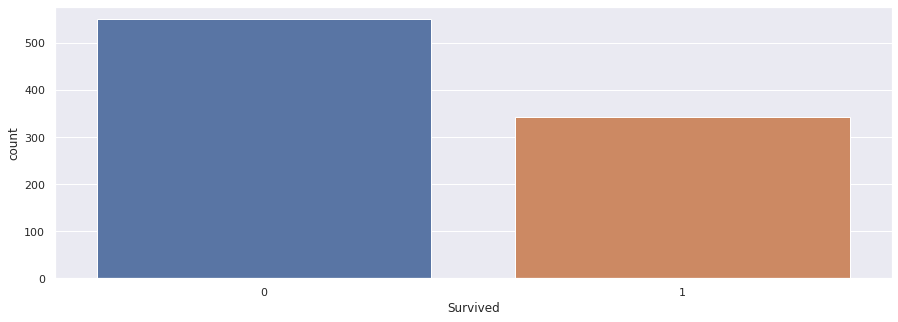

In [112]:
sns.countplot(x = 'Survived', data = df1)

Shows the count of survived people. Less number of people survived as compared to people who didn't survive.

In [ ]:
sns.countplot(x = 'Pclass', data = df1)

The order of passengers are highest for 3rd class, then 1st class and then came 2nd class at the lowest.

In [ ]:
sns.countplot(x = 'Title', data = df3)

More number of Males are present, then comes Females according to titles. The honorary title means special titles given to people from army and so on.

In [ ]:
sns.countplot(x = 'Sex', data = df1)

Count of males and females aboard the titanic.

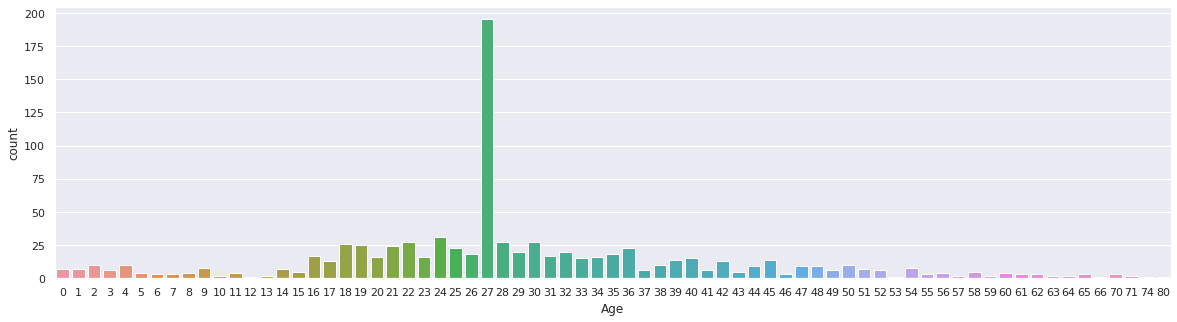

In [116]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x = 'Age', data = df2)

The distribution of age among the passengers and their count for particular number of age.

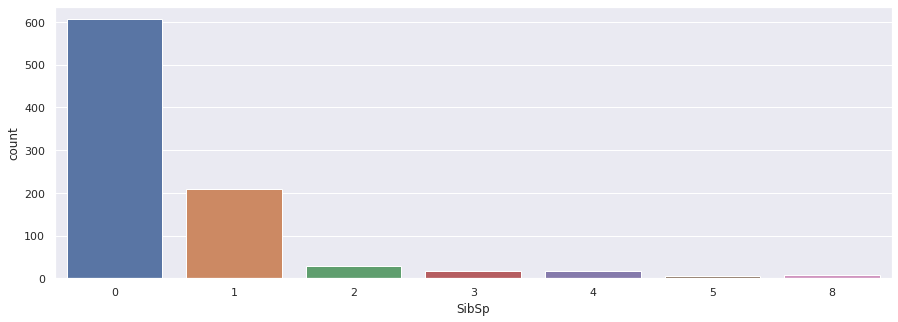

In [117]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'SibSp', data = df2)

The number of siblings present for passengers.

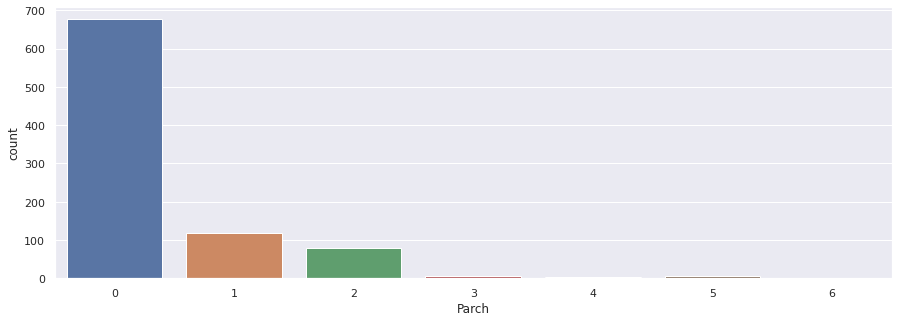

In [118]:
sns.countplot(x = 'Parch', data = df2)

The number of parents and children present.

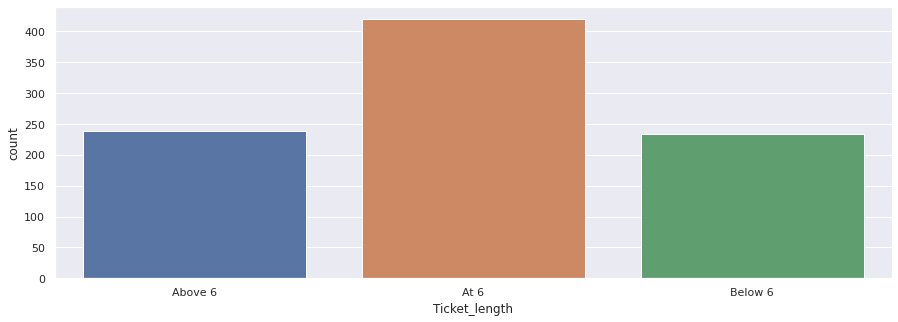

In [119]:
sns.countplot(x = 'Ticket_length', data = df4)

The ticket had numbers and alphabets attached which were not defined. So I divided the ticket on the basis of the length of numbers and alphabets they account for. This shows the length of ticket below 6, above 6 and at 6.

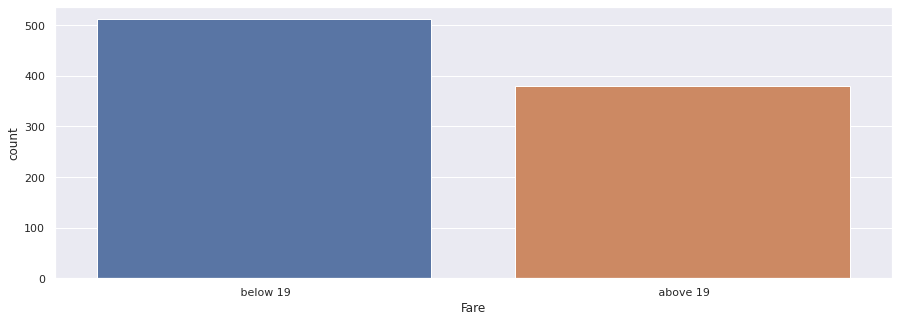

In [120]:
sns.countplot(x = 'Fare', data = df5)

The fare was quite unevenly split so I divided the fare into two parts. Below 19 and Above 19 are the categories for Fare.

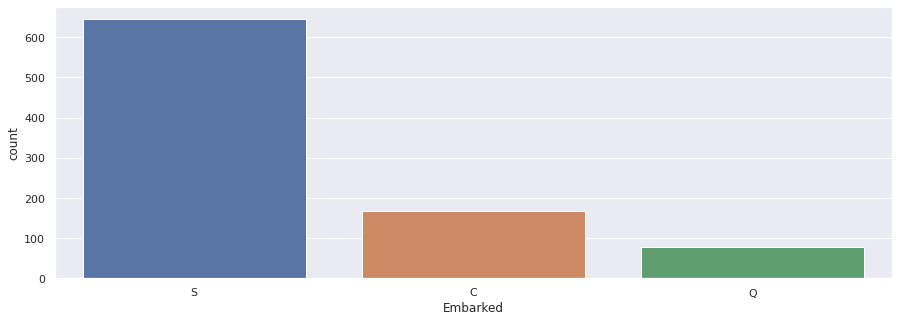

In [121]:
sns.countplot(x = 'Embarked', data = df5)

The places from where the passengers boarded the Titanic.

<h2> Bivariate Data Analysis </h2>

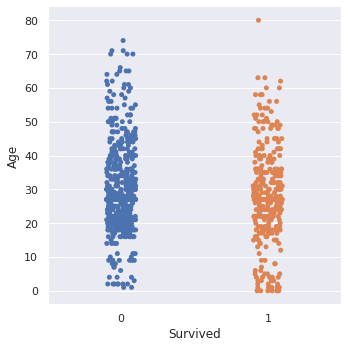

In [122]:
sns.catplot(x ='Survived', y ='Age', data = df2)

This shows that more number of young people survived the crash of Titanic.

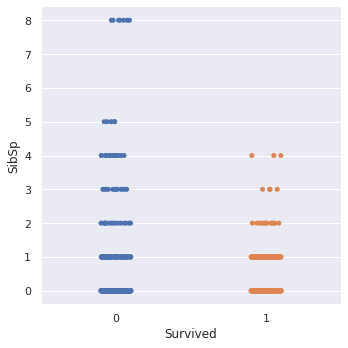

In [123]:
sns.catplot(x ='Survived', y ='SibSp', data = df2)

The number of passengers survived on the basis of the siblings the passengers had on Titanic.

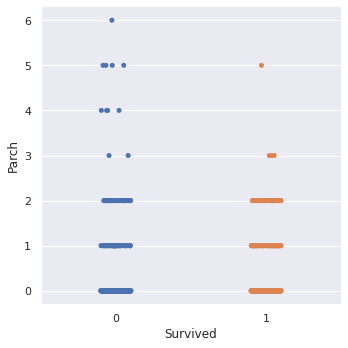

In [124]:
sns.catplot(x ='Survived', y ='Parch', data = df2)

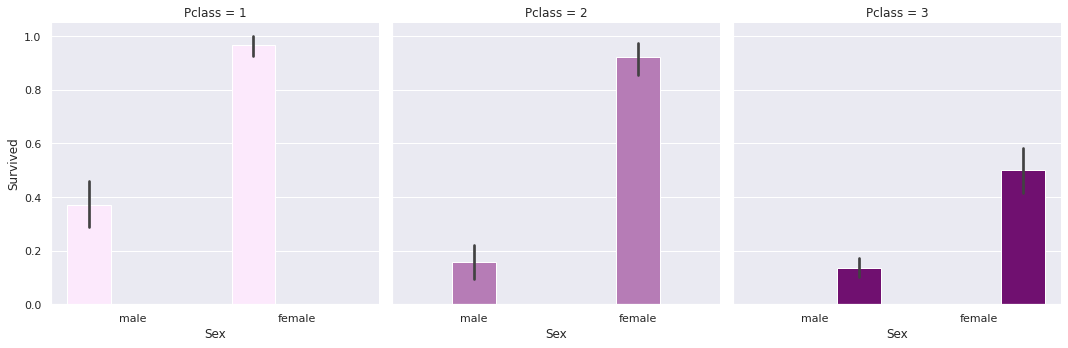

In [125]:
sns.catplot(x = 'Sex',y='Survived',hue = 'Pclass', kind = 'bar', data = df1, col = 'Pclass', color = 'purple')

The line at the top shows the mean of the values and their standard deviation around the part.
This shows how many passengers survived according to the class they belonged to and their gender.
Females and Males of class 1 survived more.
Females of all classes survived more.

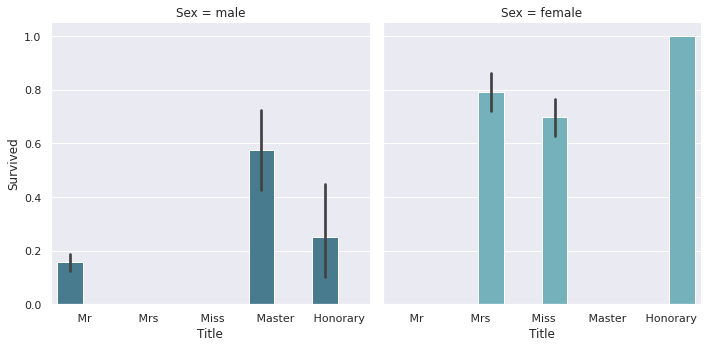

In [126]:
sns.catplot(x = 'Title',y='Survived',hue = 'Sex', kind = 'bar', data = df3, col = 'Sex', palette = 'GnBu_d')

Females survived more and those with honorary titles survived more in their respective percantage.

<h2>Explanation of Violin Plot</h2>

![Violin Plot](https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png)

Violin plots have many of the same summary statistics as box plots:

* the white dot represents the median
* the thick gray bar in the center represents the interquartile range
* the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
* the skinnier the plots, the lower the probability of values lying there.

[For more info, Check -->](https://mode.com/blog/violin-plot-examples/)

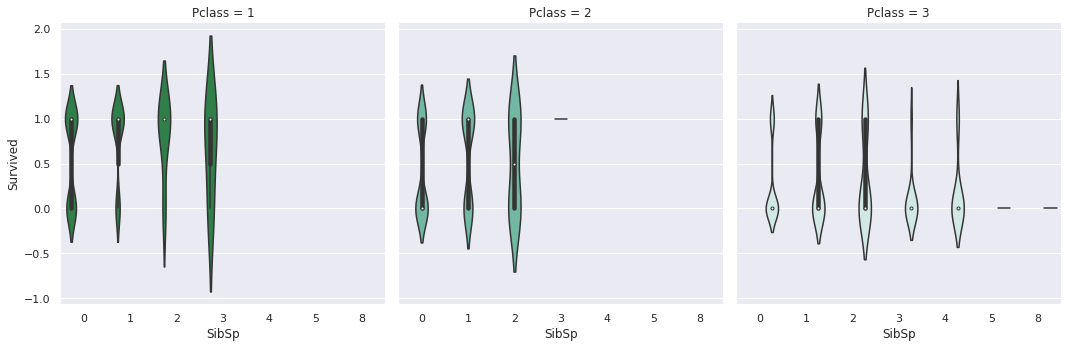

In [127]:
sns.catplot(x = 'SibSp',y='Survived',hue = 'Pclass',kind = 'violin', data = df3, palette = 'BuGn_r', col = 'Pclass')

The siblings of class 1 survived more than Class 2 and Class 1

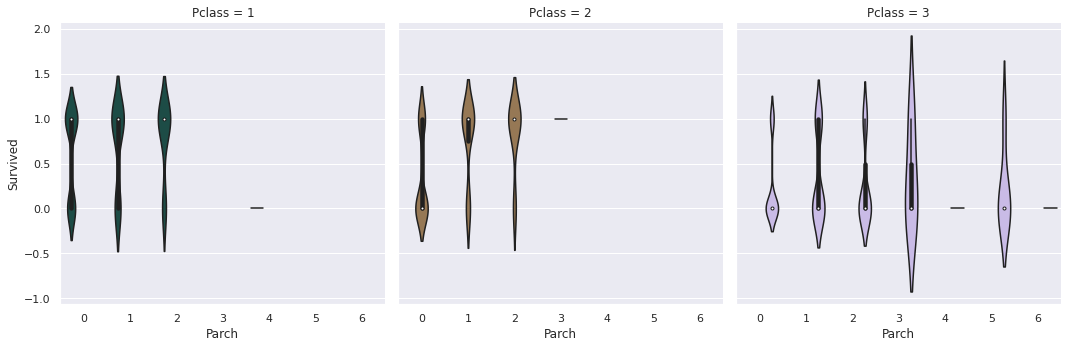

In [128]:
sns.catplot(x = 'Parch',y='Survived',hue = 'Pclass',kind = 'violin', data = df3, palette = 'cubehelix', col = 'Pclass')

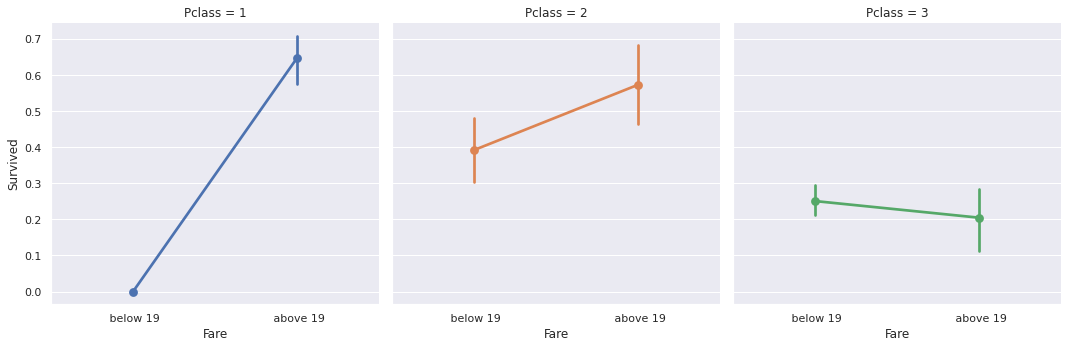

In [129]:
sns.catplot(x = 'Fare',y='Survived',kind = 'point', data = df5, hue = 'Pclass', col = 'Pclass')

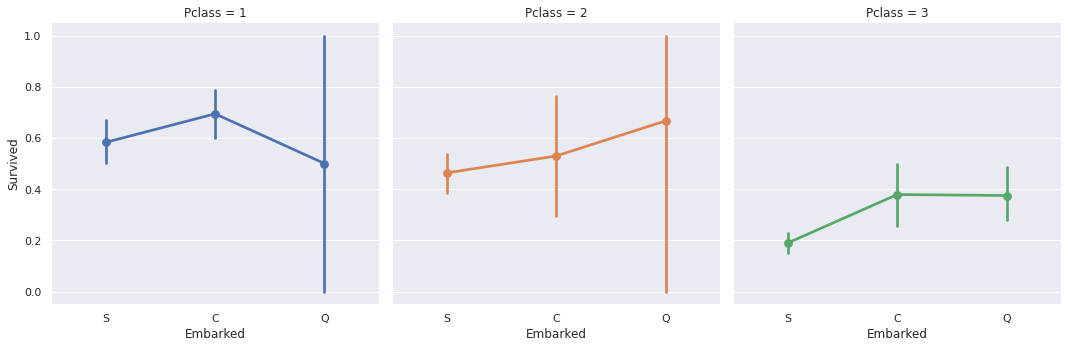

In [130]:
sns.catplot(x = 'Embarked',y='Survived',kind = 'point', data = df5, hue = 'Pclass', col = 'Pclass')

In [131]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male,Ticket Length_Above 6,Ticket Length_At 6,Ticket Length_Below 6,Fare_ above 19,Fare_ below 19,Emarked from_Cherbourg,Emarked from_Queenstown,Emarked from_Southampton
0,0,3,22,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
1,1,1,38,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0
2,1,3,26,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,1,1,35,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1
4,0,3,35,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1


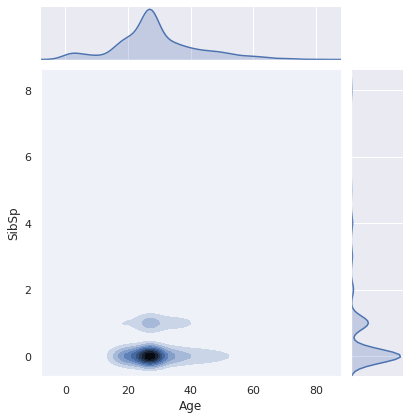

In [132]:
sns.jointplot(x=df2['Age'], y=df2['SibSp'], kind = 'kde')

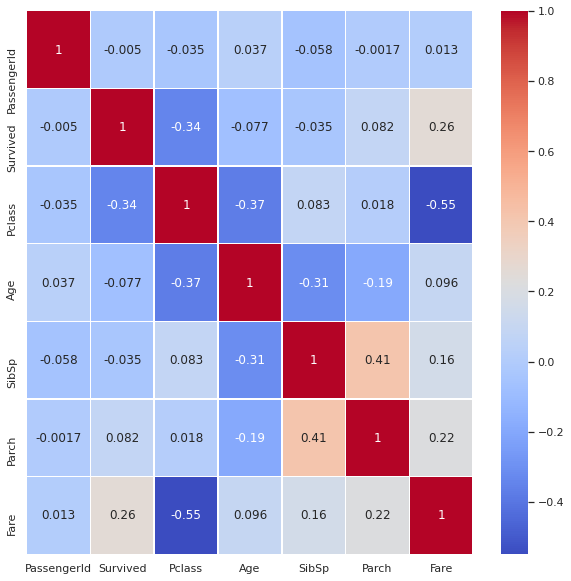

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

The correlation among the Columns.

# Model Training


1. Logistic Regression
1. Support Vector Machine
1. Decision Tree
1. Naive Bayes
1. Random Forest
1. Gradient Boosting
1. K-Nearest Neighbor
1. XG Bosst

In [220]:
#The models trained
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

#For Scaling and Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [135]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Title_ Honorary,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Gender__female,Gender__male,Ticket Length_Above 6,Ticket Length_At 6,Ticket Length_Below 6,Fare_ above 19,Fare_ below 19,Emarked from_Cherbourg,Emarked from_Queenstown,Emarked from_Southampton
0,0,3,22,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
1,1,1,38,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0
2,1,3,26,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,1,1,35,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1
4,0,3,35,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1


In [136]:
x = df2.drop(['Survived'],axis = 1)
y = df2['Survived']

In [137]:
tx = tf2
tx.shape

(418, 19)

In [138]:
accuracy = []

In [200]:
feature_scaler = StandardScaler()
x = feature_scaler.fit_transform(x)

In [201]:
feature = StandardScaler()
tx = feature.fit_transform(tx)

# Models without Hyperparameter Tuning

<h3>Logistic Regression</h3>

In [202]:
LR = LogisticRegression()
cv = cross_val_score(LR,x,y,cv=10)
accuracy1 = cv.mean()
accuracy.append(accuracy1)
print(cv)
print(cv.mean())

[0.80898876 0.82022472 0.76404494 0.87640449 0.85393258 0.80898876
 0.79775281 0.79775281 0.87640449 0.85227273]
0.8256767109295199


Submission 4 for Logisitc Regression without Hyperparameter Tuning

In [203]:
LR.fit(x,y)
model4pred = LR.predict(tx)
submission4 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission4['PassengerId'] = result['PassengerId']
submission4['Survived'] = model4pred
submission4.to_csv('submission4.csv',index = False)

<h3>Support Vector Machine</h3>

Support Vector Machine using Linear kernel

In [204]:
SVC = LinearSVC(random_state = 1)
cv = cross_val_score(SVC,x,y,cv=10)
accuracy2 = cv.mean()
accuracy.append(accuracy2)
print(cv)
print(cv.mean())


[0.83146067 0.83146067 0.7752809  0.86516854 0.83146067 0.80898876
 0.79775281 0.7752809  0.87640449 0.86363636]
0.8256894790602656


Submission 2 for SVC without Hyperparameter Optimisation

In [205]:
SVC.fit(x,y)
model2pred = SVC.predict(tx)
submission2 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission2['PassengerId'] = result['PassengerId']
submission2['Survived'] = model2pred
submission2.to_csv('submission2.csv',index = False)

Support Vector Machine using Polynomial kernel

In [206]:
v = svm.SVC(kernel = 'poly')
cv = cross_val_score(v,x,y,cv=10)
print(cv)
print(cv.mean())


[0.80898876 0.83146067 0.76404494 0.87640449 0.85393258 0.80898876
 0.78651685 0.76404494 0.82022472 0.86363636]
0.8178243105209397


Submission 3 for SVC without Hyperparameter Optimisation

In [207]:
v.fit(x,y)
model3pred = v.predict(tx)
submission3 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission3['PassengerId'] = result['PassengerId']
submission3['Survived'] = model3pred
submission3.to_csv('submission3.csv',index = False)

<h3>Decision Tree</h3>

In [208]:
DT = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(DT,x,y,cv=10)
accuracy3 = cv.mean()
accuracy.append(accuracy3)
print(cv)
print(cv.mean())

[0.71910112 0.79775281 0.71910112 0.78651685 0.7752809  0.76404494
 0.80898876 0.74157303 0.79775281 0.77272727]
0.7682839632277835


<h3>Gaussian NB</h3>


In [209]:
GNB = GaussianNB()
cv = cross_val_score(GNB,x,y,cv=10)
accuracy4 = cv.mean()
accuracy.append(accuracy4)
print(cv)
print(cv.mean())

[0.7752809  0.82022472 0.73033708 0.86516854 0.80898876 0.79775281
 0.80898876 0.75280899 0.84269663 0.78409091]
0.7986338100102145


<h3>Multinomial NB</h3>

In [211]:
'''
MNB = MultinomialNB()
cv = cross_val_score(MNB,x,y,cv=10)
accuracy5 = cv.mean()
accuracy.append(accuracy5)
print(cv)
print(cv.mean())
'''

'\nMNB = MultinomialNB()\ncv = cross_val_score(MNB,x,y,cv=10)\naccuracy5 = cv.mean()\naccuracy.append(accuracy5)\nprint(cv)\nprint(cv.mean())\n'

<h3>Random Forest Classifier</h3>

In [212]:
RF = RandomForestClassifier(random_state = 1)
cv = cross_val_score(RF,x,y,cv=10)
accuracy6 = cv.mean()


accuracy.append(accuracy6)
print(cv)
print(cv.mean())

[0.76404494 0.78651685 0.73033708 0.84269663 0.80898876 0.82022472
 0.7752809  0.74157303 0.82022472 0.81818182]
0.7908069458631257


<h3>Gradient Boosting Classifier</h3>

In [213]:
GBC = GradientBoostingClassifier(random_state = 1)
cv = cross_val_score(GBC,x,y,cv=10)

GBC.fit(x,y)
model1pred = GBC.predict(tx)
submission1 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission1['PassengerId'] = result['PassengerId']
submission1['Survived'] = model1pred

accuracy7 = cv.mean()
accuracy.append(accuracy7)
print(cv)
print(cv.mean())

[0.80898876 0.82022472 0.76404494 0.86516854 0.86516854 0.82022472
 0.82022472 0.78651685 0.8988764  0.85227273]
0.8301710929519919


Submission for Gradient Boosting (Without Hyperparameter optimisation)

In [214]:
submission1.to_csv('submission1.csv',index = False)

<h3>XG Boosting</h3>

In [215]:
XGB = XGBClassifier(random_state = 1)
cv = cross_val_score(XGB,x,y,cv=10)
accuracy8 = cv.mean()
accuracy.append(accuracy8)
print(cv)
print(cv.mean())

[0.76404494 0.79775281 0.76404494 0.83146067 0.83146067 0.86516854
 0.82022472 0.73033708 0.86516854 0.80681818]
0.8076481103166497


<h3>K-Nearest Neigbhbors</h3>

Text(0, 0.5, 'Accuracy')

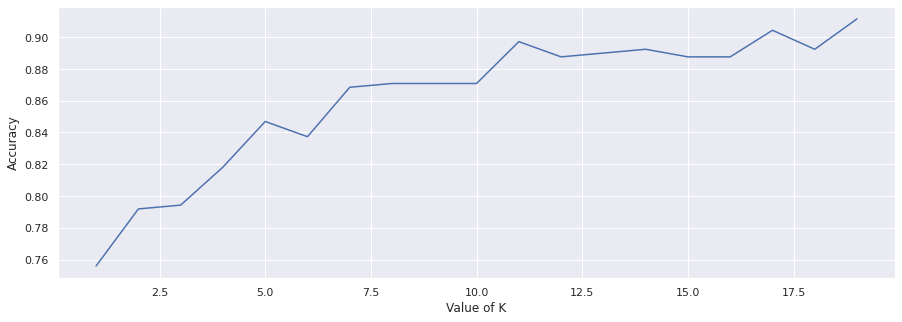

In [223]:
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x,y)
    y_pred = knn.predict(tx)
    scores[k] = metrics.accuracy_score(result['Survived'],y_pred)
    scores_list.append(metrics.accuracy_score(result['Survived'],y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [241]:
KNN = KNeighborsClassifier(n_neighbors = 16)
cv = cross_val_score(KNN,x,y,cv=10)
accuracy9 = cv.mean()
accuracy.append(accuracy9)
print(cv)
print(cv.mean())

[0.79775281 0.84269663 0.7752809  0.86516854 0.83146067 0.82022472
 0.7752809  0.75280899 0.82022472 0.85227273]
0.8133171603677221


Submission 5 for KNN

In [155]:
KNN.fit(x,y)
model5pred = SVC.predict(tx)
submission5 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission5['PassengerId'] = result['PassengerId']
submission5['Survived'] = model5pred
submission5.to_csv('submission5.csv',index = False)

In [156]:
Models = ['Logistic Regression','SVM Classifier','Decision Tree','Gaussian NB','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','XG Boosting','K-Nearest Neighbors']
total = list(zip(Models,accuracy))
output1 = pd.DataFrame(total, columns = ['Models','Accuracy'])


In [157]:
o = output1.groupby(['Models'])['Accuracy'].mean().reset_index().sort_values(by='Accuracy',ascending=False)
o.head(10).style.background_gradient(cmap='Reds')


,Models,Accuracy
2,Gradient Boost Classifier,0.831295
7,SVM Classifier,0.826800
4,Logistic Regression,0.825664
3,K-Nearest Neighbors,0.815539
8,XG Boosting,0.807648
1,Gaussian NB,0.798634
5,Multinomial NB,0.789632
6,Random Forest Classifier,0.786300
0,Decision Tree,0.762640


# Models after Hyperparameter Optimisation

In [158]:
Accuracy = []

<h3>Logistic Regression</h3>

In [159]:
C = [0.01,0.1, 1, 10, 100]
penalty = ['l2']
solver = ['newton-cg','lbfgs','liblinear']
class_weight = ['dict','balanced','None']
max_iter = [900,1000]

Log = LogisticRegression()
#print(Log.get_params().keys())

parameters = {'C': [0.01,0.1, 1, 10, 100],'penalty' : ['l2'],'solver' : ['newton-cg','lbfgs','liblinear'],'class_weight':['dict','balanced','None'],'max_iter':[900,1000]}

log_regressor = GridSearchCV(Log, parameters, scoring='accuracy',cv =10)
log_regressor.fit(x, y)
log_regressor.best_params_


{'C': 10,
 'class_weight': 'dict',
 'max_iter': 900,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [160]:
log_regressor.best_score_

0.8279239019407558

In [161]:
lr = LogisticRegression(C = 10,penalty = 'l2', solver = 'newton-cg',class_weight = 'dict', max_iter = 900)
cv = cross_val_score(lr,x,y,cv=10)
Accuracy1 = cv.mean()
Accuracy.append(Accuracy1)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.7752809  0.87640449 0.85393258 0.80898876
 0.79775281 0.79775281 0.87640449 0.85227273]
0.8279239019407558


Submission 6 for Logistic Regression by HyperParameter Tuning

In [162]:
lr.fit(x,y)
model6pred = lr.predict(tx)
submission6 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission6['PassengerId'] = result['PassengerId']
submission6['Survived'] = model6pred
submission6.to_csv('submission6.csv',index = False)

<h3> Support Vector Machine </h3>

Linear SVC

In [163]:
penalty = ['l1','l2']
loss = ['hinge','squared_hinge']
class_weight = ['dict','balanced','None']
C = [.1,1,10,50,100,150]
random_state = [1]

SVM = LinearSVC()

parameters = {'penalty':['l1','l2'],'loss':['hinge','squared_hinge'],'class_weight':['dict','balanced','None'] ,'C': [.1,1,10,50,100,150],'random_state':[1]}

SVM_classifier = GridSearchCV(SVM, parameters, scoring='accuracy' ,cv =10)
SVM_classifier.fit(x, y)
SVM_classifier.best_params_


{'C': 100,
 'class_weight': 'balanced',
 'loss': 'hinge',
 'penalty': 'l2',
 'random_state': 1}

In [164]:
SVM_classifier.best_score_

0.8155515832482125

In [165]:
svc = LinearSVC(C = 100,penalty = 'l2', loss = 'hinge',class_weight = 'balanced',random_state = 1)
cv = cross_val_score(svc,x,y,cv=10)
Accuracy2 = cv.mean()
Accuracy.append(Accuracy2)
print(cv)
print(cv.mean())

[0.82022472 0.85393258 0.74157303 0.87640449 0.80898876 0.79775281
 0.79775281 0.74157303 0.87640449 0.84090909]
0.8155515832482125


Overall SVC

In [166]:
kernel = ['linear','poly','rbf','sigmoid','precomputed']
degree = [1,2,3]
class_weight = ['dict','balanced','None']
C = [.1,1,10,50,100,150]
random_state = [1]

s = svm.SVC()

parameters = {'kernel':['linear','poly','rbf','sigmoid'],'class_weight':['dict','balanced','None'] ,'C': [.1,1,10,50,100,150],'random_state':[1],'degree':[1,2,3]}

svcc = GridSearchCV(s, parameters, scoring='accuracy' ,cv =10)
svcc.fit(x, y)
svcc.best_params_


{'C': 1,
 'class_weight': 'balanced',
 'degree': 2,
 'kernel': 'poly',
 'random_state': 1}

In [167]:
svcc.best_score_

0.8223059244126659

In [168]:
SVM_all = svm.SVC(C = 1,degree = 2, kernel = 'poly',class_weight = 'balanced',random_state = 1)
cv = cross_val_score(SVM_all,x,y,cv=10)
Accuracy3 = cv.mean()
Accuracy.append(Accuracy3)
print(cv)
print(cv.mean())

[0.84269663 0.85393258 0.74157303 0.87640449 0.82022472 0.80898876
 0.80898876 0.76404494 0.85393258 0.85227273]
0.8223059244126659


Submission 7 for SVC with Hyperparameter Tuning

In [169]:
SVM_all.fit(x,y)
model7pred = SVM_all.predict(tx)
submission7 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission7['PassengerId'] = result['PassengerId']
submission7['Survived'] = model7pred
submission7.to_csv('submission7.csv',index = False)

<h3>Decision Trees</h3>

In [170]:
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [5,10,15,20,25]
min_samples_split = [2,3,4,5]
random_state = [1]
class_weight = ['dict','balanced','None']


Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy'],'splitter': ['best','random'], 'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'random_state':[1],'class_weight':['dict','balanced','None']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='accuracy' ,cv = 10)
tree_classifier.fit(x, y)
tree_classifier.best_params_


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 2,
 'random_state': 1,
 'splitter': 'best'}

In [171]:
tree_classifier.best_score_


0.8155388151174667

In [172]:
dt = DecisionTreeClassifier(class_weight = 'balanced',criterion = 'entropy',max_depth = 5,min_samples_split = 2,random_state = 1,splitter = 'best')
cv = cross_val_score(dt,x,y,cv=10)
Accuracy4 = cv.mean()
Accuracy.append(Accuracy4)
print(cv)
print(cv.mean())

[0.82022472 0.86516854 0.75280899 0.80898876 0.82022472 0.80898876
 0.79775281 0.78651685 0.86516854 0.82954545]
0.8155388151174667


<h3>Naive Bayes</h3>

In [173]:
alpha = [0.01,0.1, 1, 10, 100]
fit_prior = [True,False]

mnb = MultinomialNB()

parameters = {'alpha': [0.01,0.1, 1, 10, 100],'fit_prior' : [True,False]}

mn = GridSearchCV(mnb, parameters, scoring='accuracy',cv =10)
mn.fit(x, y)
mn.best_params_


{'alpha': 10, 'fit_prior': False}

In [174]:
mn.best_score_

0.7907814096016343

In [175]:
mnb = MultinomialNB(alpha = 10,fit_prior = False)
cv = cross_val_score(mnb,x,y,cv=10)
Accuracy5 = cv.mean()
Accuracy.append(Accuracy5)
print(cv)
print(cv.mean())

[0.78651685 0.79775281 0.74157303 0.85393258 0.78651685 0.78651685
 0.78651685 0.76404494 0.80898876 0.79545455]
0.7907814096016343


<h3> Random Forest Classifier </h3>

In [176]:
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_depth = [5,10,15,20,25]
min_samples_split = [2,3,4,5]
bootstrap = [True,False]
oob_score = [True,False]
class_weight = ['balanced','balanced_subsample','dict']
max_features = ['auto','sqrt','log2']
random_state = [1]

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'bootstrap':[True,False]
              ,'oob_score':[True,False],'class_weight':['balanced','balanced_subsample','dict'],'max_features':['auto','sqrt','log2'],'random_state':[1]}

RFClassifier = RandomizedSearchCV(RF, parameters, scoring='accuracy' ,cv =5)
RFClassifier.fit(x, y)
RFClassifier.best_params_

{'random_state': 1,
 'oob_score': False,
 'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [177]:
RFClassifier.best_score_

0.8031866945978544

In [178]:
n_estimators = [400,450,500,550,600,650]
criterion = ['gini']
max_depth = [9,10,11]
min_samples_split = [5,6]
bootstrap = [True]
oob_score = [True]
class_weight = ['balanced_subsample']
max_features = ['sqrt']
random_state = [1]

rF = RandomForestClassifier()

parameters = {'n_estimators': [400,450,500,550,600,650],'criterion': ['gini'],'max_depth':[9,10,11],'min_samples_split':[5,6],'bootstrap':[True]
              ,'oob_score':[True],'class_weight':['balanced_subsample'],'max_features':['sqrt'],'random_state':[1]}

RClassifier = GridSearchCV(rF, parameters, scoring='accuracy' ,cv =5)
RClassifier.fit(x, y)
RClassifier.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 450,
 'oob_score': True,
 'random_state': 1}

In [179]:
RClassifier.best_score_

0.8256903446962485

In [180]:
rf = RandomForestClassifier(random_state = 1,oob_score = True,n_estimators =450 ,min_samples_split = 6,max_features = 'sqrt',max_depth =9,criterion = 'gini',class_weight = 'balanced_subsample',bootstrap = True)
cv = cross_val_score(rf,x,y,cv=10)
Accuracy6 = cv.mean()
Accuracy.append(Accuracy6)
print(cv)
print(cv.mean())

[0.80898876 0.83146067 0.75280899 0.83146067 0.83146067 0.84269663
 0.83146067 0.78651685 0.86516854 0.875     ]
0.8257022471910112


Submission 8 for Random Forest with Hyperparameter Tuning


In [181]:
rf.fit(x,y)
model8pred = rf.predict(tx)
submission8 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission8['PassengerId'] = result['PassengerId']
submission8['Survived'] = model8pred
submission8.to_csv('submission8.csv',index = False)

<h3> Gradient Boosting Classifier </h3>

In [182]:
n_estimators = [250,500,750,1000]
learning_rate = [.01,.1,1,5]
subsample = [.01,.1,1,5]
min_samples_split = [2,3,4,5]
max_depth = [5,10,15,20,25]
loss = ['deviance','exponential']
max_features = ['auto','sqrt','log2']
random_state = [1]

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2'],'learning_rate':[.01,.1,1,5],'subsample':[.01,.1,1,5],
             'min_samples_split':[2,3,4,5],'max_depth':[5,10,15,20,25],'random_state':[1]}

GBClassifier = RandomizedSearchCV(GB, parameters, scoring='accuracy' ,cv =5)
GBClassifier.fit(x, y)
GBClassifier.best_params_

{'subsample': 1,
 'random_state': 1,
 'n_estimators': 250,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 5,
 'loss': 'exponential',
 'learning_rate': 0.01}

In [183]:
GBClassifier.best_score_

0.8324636577159905

In [184]:
n_estimators = [200,250,300]
learning_rate = [.01]
subsample = [.05,.1]
min_samples_split = [4]
max_depth = [15,16]
loss = ['deviance']
max_features = ['log2']
random_state = [1]

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [200,250,300],'loss': ['deviance'],'max_features':['log2'],'learning_rate':[.01],'subsample':[.05,.1],
             'min_samples_split':[4],'max_depth':[15,16],'random_state':[1]}

GBClassifier = GridSearchCV(GB, parameters, scoring='accuracy' ,cv =5)
GBClassifier.fit(x, y)
GBClassifier.best_params_

{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 200,
 'random_state': 1,
 'subsample': 0.1}

In [185]:
GBClassifier.best_score_

0.8313019742271314

In [186]:
gbc = GradientBoostingClassifier(random_state = 1,loss = 'deviance',n_estimators =200 ,min_samples_split = 4,max_features = 'log2',max_depth =15,learning_rate = .01,subsample = .1)
cv = cross_val_score(gbc,x,y,cv=10)
Accuracy7 = cv.mean()
Accuracy.append(Accuracy7)
print(cv)
print(cv.mean())

[0.82022472 0.83146067 0.7752809  0.8988764  0.84269663 0.80898876
 0.79775281 0.79775281 0.87640449 0.85227273]
0.8301710929519917


Submission 9 for Gradient Boost Classifier with Hyperparameter Tuning

In [187]:
gbc.fit(x,y)
model9pred = gbc.predict(tx)
submission9 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission9['PassengerId'] = result['PassengerId']
submission9['Survived'] = model9pred
submission9.to_csv('submission9.csv',index = False)

<h3>XG Boosting</h3>

In [188]:
min_child_weight = [1,5,10]
gamma = [.5,1,1.5,2,2.5]
subsample = [.6,.8,1]
colsample_bytree = [.6,.8,1]
eta = [.01,.05,.1,.5,.2]
max_depth = [3,4,5,6,7,8,9,10]
random_state = [1]

XB = XGBClassifier()

parameters = {'min_child_weight': [1,5,10],'gamma': [.5,1,1.5,2,2.5],'subsample':[.6,.8,1],'colsample_bytree':[.6,.8,1],'subsample':[.6,.8,1],
             'eta':[.01,.05,.1,.5,.2],'max_depth':[3,4,5,6,7,8,9,10],'random_state':[1]}

XBClassifier = RandomizedSearchCV(XB, parameters, scoring='accuracy' ,cv =5)
XBClassifier.fit(x, y)
XBClassifier.best_params_

{'subsample': 1,
 'random_state': 1,
 'min_child_weight': 1,
 'max_depth': 8,
 'gamma': 2,
 'eta': 0.2,
 'colsample_bytree': 0.8}

In [189]:
XBClassifier.best_score_

0.8369326477496349

In [190]:
min_child_weight = [10,11,12]
gamma = [1.5,2]
subsample = [.8]
colsample_bytree = [.8]
eta = [.5,.2]
max_depth = [2,3]
random_state = [1]

XB = XGBClassifier()

parameters = {'min_child_weight': [10,11,12],'gamma': [1.5,2],'subsample':[.8],'colsample_bytree':[.8],'subsample':[.8],
             'eta':[.5,.2],'max_depth':[2,3],'random_state':[1]}

XBClassifier = GridSearchCV(XB, parameters, scoring='accuracy' ,cv =5)
XBClassifier.fit(x, y)
XBClassifier.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.5,
 'gamma': 1.5,
 'max_depth': 3,
 'min_child_weight': 10,
 'random_state': 1,
 'subsample': 0.8}

In [191]:
XBClassifier.best_score_

0.8312956262299245

In [192]:
xgb = XGBClassifier(random_state = 1,colsample_bytree = 0.8,eta = 0.5,gamma = 1.5,max_depth = 3,min_child_weight = 10,subsample = 0.8)
cv = cross_val_score(xgb,x,y,cv=10)
Accuracy8 = cv.mean()
Accuracy.append(Accuracy8)
print(cv)
print(cv.mean())

[0.80898876 0.80898876 0.76404494 0.86516854 0.87640449 0.80898876
 0.83146067 0.83146067 0.85393258 0.82954545]
0.8278983656792646


Submission 10 for XB Boost with Hyperparameter Tuning

In [193]:
xgb.fit(x,y)
model10pred = xgb.predict(tx)
submission10 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission10['PassengerId'] = result['PassengerId']
submission10['Survived'] = model10pred
submission10.to_csv('submission10.csv',index = False)

In [194]:
KNN = KNeighborsClassifier(n_neighbors = 3)
cv = cross_val_score(KNN,x,y,cv=10)
Accuracy9 = cv.mean()
Accuracy.append(Accuracy9)
print(cv)
print(cv.mean())

[0.7752809  0.82022472 0.76404494 0.86516854 0.79775281 0.87640449
 0.83146067 0.76404494 0.83146067 0.82954545]
0.8155388151174667


In [195]:
models = ['Logistic Regression','SVM Linear Classifier','SVM Polynomial Classifier','Decision Tree','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','XG Boosting','K-Nearest Neighbors']
total = list(zip(models,Accuracy))
output2 = pd.DataFrame(total, columns = ['Models after Hyperparameter Tuning','Accuracy after HT'])

In [196]:
o = output2.groupby(['Models after Hyperparameter Tuning'])['Accuracy after HT'].mean().reset_index().sort_values(by='Accuracy after HT',ascending=False)
o.head(10).style.background_gradient(cmap='Reds')


,Models after Hyperparameter Tuning,Accuracy after HT
1,Gradient Boost Classifier,0.830171
3,Logistic Regression,0.827924
8,XG Boosting,0.827898
5,Random Forest Classifier,0.825702
7,SVM Polynomial Classifier,0.822306
6,SVM Linear Classifier,0.815552
0,Decision Tree,0.815539
2,K-Nearest Neighbors,0.815539
4,Multinomial NB,0.790781


In [197]:
output = pd.concat([output1,output2],axis = 1)
output.sort_values(by=['Accuracy after HT'], inplace=True, ascending=False)
output.head(10)

,Models,Accuracy,Models after Hyperparameter Tuning,Accuracy after HT
6,Gradient Boost Classifier,0.831295,Gradient Boost Classifier,0.830171
0,Logistic Regression,0.825664,Logistic Regression,0.827924
7,XG Boosting,0.807648,XG Boosting,0.827898
5,Random Forest Classifier,0.786300,Random Forest Classifier,0.825702
2,Decision Tree,0.762640,SVM Polynomial Classifier,0.822306
1,SVM Classifier,0.826800,SVM Linear Classifier,0.815552
3,Gaussian NB,0.798634,Decision Tree,0.815539
8,K-Nearest Neighbors,0.815539,K-Nearest Neighbors,0.815539
4,Multinomial NB,0.789632,Multinomial NB,0.790781
